**Import Libraries and Load Data**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The name of your CSV file
file_name = 'space_missions.csv'

# Load the CSV file into a pandas DataFrame
# We use error_bad_lines=False to skip any rows that might have formatting issues.
try:
    df = pd.read_csv(file_name,encoding='latin1')
except Exception as e:
    # A fallback for different pandas versions or specific errors
    print(f"Initial read failed. Error: {e}")
    print("Attempting to read with a different parser...")
    df = pd.read_csv(file_name, encoding='latin1')


# Display the first 5 rows of the DataFrame to confirm it loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*50 + "\n")

# Display a summary of the DataFrame, including data types and non-null counts
print("DataFrame Information:")
df.info()

First 5 rows of the dataset:
     Company                                   Location        Date      Time  \
0  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04  19:28:00   
1  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03  02:30:00   
2    US Navy   LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06  16:44:00   
3       AMBA   LC-26A, Cape Canaveral AFS, Florida, USA  1958-02-01  03:48:00   
4    US Navy   LC-18A, Cape Canaveral AFS, Florida, USA  1958-02-05  07:33:00   

           Rocket         Mission RocketStatus Price MissionStatus  
0  Sputnik 8K71PS       Sputnik-1      Retired   NaN       Success  
1  Sputnik 8K71PS       Sputnik-2      Retired   NaN       Success  
2        Vanguard    Vanguard TV3      Retired   NaN       Failure  
3          Juno I      Explorer 1      Retired   NaN       Success  
4        Vanguard  Vanguard TV3BU      Retired   NaN       Failure  


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIn

**Data Cleaning and Preparation (Objective 1)**

In [10]:
# Convert the 'Date' column to datetime objects
# The `errors='coerce'` argument will turn any problematic dates into 'NaT' (Not a Time)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the 'Year' from the 'Date' column and create a new column for it
df['Year'] = df['Date'].dt.year

# Drop any rows where the date could not be parsed (if any)
df.dropna(subset=['Date'], inplace=True)

# Convert the 'Year' to an integer type
df['Year'] = df['Year'].astype(int)

# Check the data types again and print the first 5 rows with the new 'Year' column
print("DataFrame Information after Date Conversion:")
df.info()

print("\n" + "="*50 + "\n")

print("First 5 rows with the new 'Year' column:")
print(df.head())

DataFrame Information after Date Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   object        
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   object        
 8   MissionStatus  4630 non-null   object        
 9   Year           4630 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 361.8+ KB


First 5 rows with the new 'Year' column:
     Company                                   Location       Date      Time  \
0  RVSN USSR  Site 1/5, Baikonur Cosmodrom

**Calculate Overall Mission Success Rates**

In [11]:
# Count the occurrences of each status in the 'MissionStatus' column
status_counts = df['MissionStatus'].value_counts()

# Calculate the total number of missions
total_missions = len(df)

# Calculate the percentage for each status
status_percentages = (status_counts / total_missions) * 100

print("Overall Mission Status Counts:")
print(status_counts)

print("\n" + "="*50 + "\n")

print("Overall Mission Status Percentages:")
print(status_percentages.round(2))

Overall Mission Status Counts:
MissionStatus
Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: count, dtype: int64


Overall Mission Status Percentages:
MissionStatus
Success              89.89
Failure               7.71
Partial Failure       2.31
Prelaunch Failure     0.09
Name: count, dtype: float64


**Analyze Mission Success Rates by Year (Objective 2)**

In [12]:
# Group by 'Year' and 'MissionStatus', then count the number of missions in each group
yearly_status_counts = df.groupby(['Year', 'MissionStatus']).size().unstack(fill_value=0)

# Calculate the total number of missions per year
yearly_status_counts['Total'] = yearly_status_counts.sum(axis=1)

# Calculate the success rate (percentage) for each year
# We will focus on the 'Success' status for the rate calculation
yearly_status_counts['Success_Rate'] = (yearly_status_counts['Success'] / yearly_status_counts['Total']) * 100

print("Mission Status Counts and Success Rate per Year:")
print(yearly_status_counts.head())

print("\n... (showing first 5 rows) ...\n")

print("Last 5 rows of the yearly analysis:")
print(yearly_status_counts.tail())

Mission Status Counts and Success Rate per Year:
MissionStatus  Failure  Partial Failure  Prelaunch Failure  Success  Total  \
Year                                                                         
1957                 1                0                  0        2      3   
1958                20                2                  0        6     28   
1959                 9                3                  0        8     20   
1960                20                0                  0       19     39   
1961                17                3                  0       32     52   

MissionStatus  Success_Rate  
Year                         
1957              66.666667  
1958              21.428571  
1959              40.000000  
1960              48.717949  
1961              61.538462  

... (showing first 5 rows) ...

Last 5 rows of the yearly analysis:
MissionStatus  Failure  Partial Failure  Prelaunch Failure  Success  Total  \
Year                                           

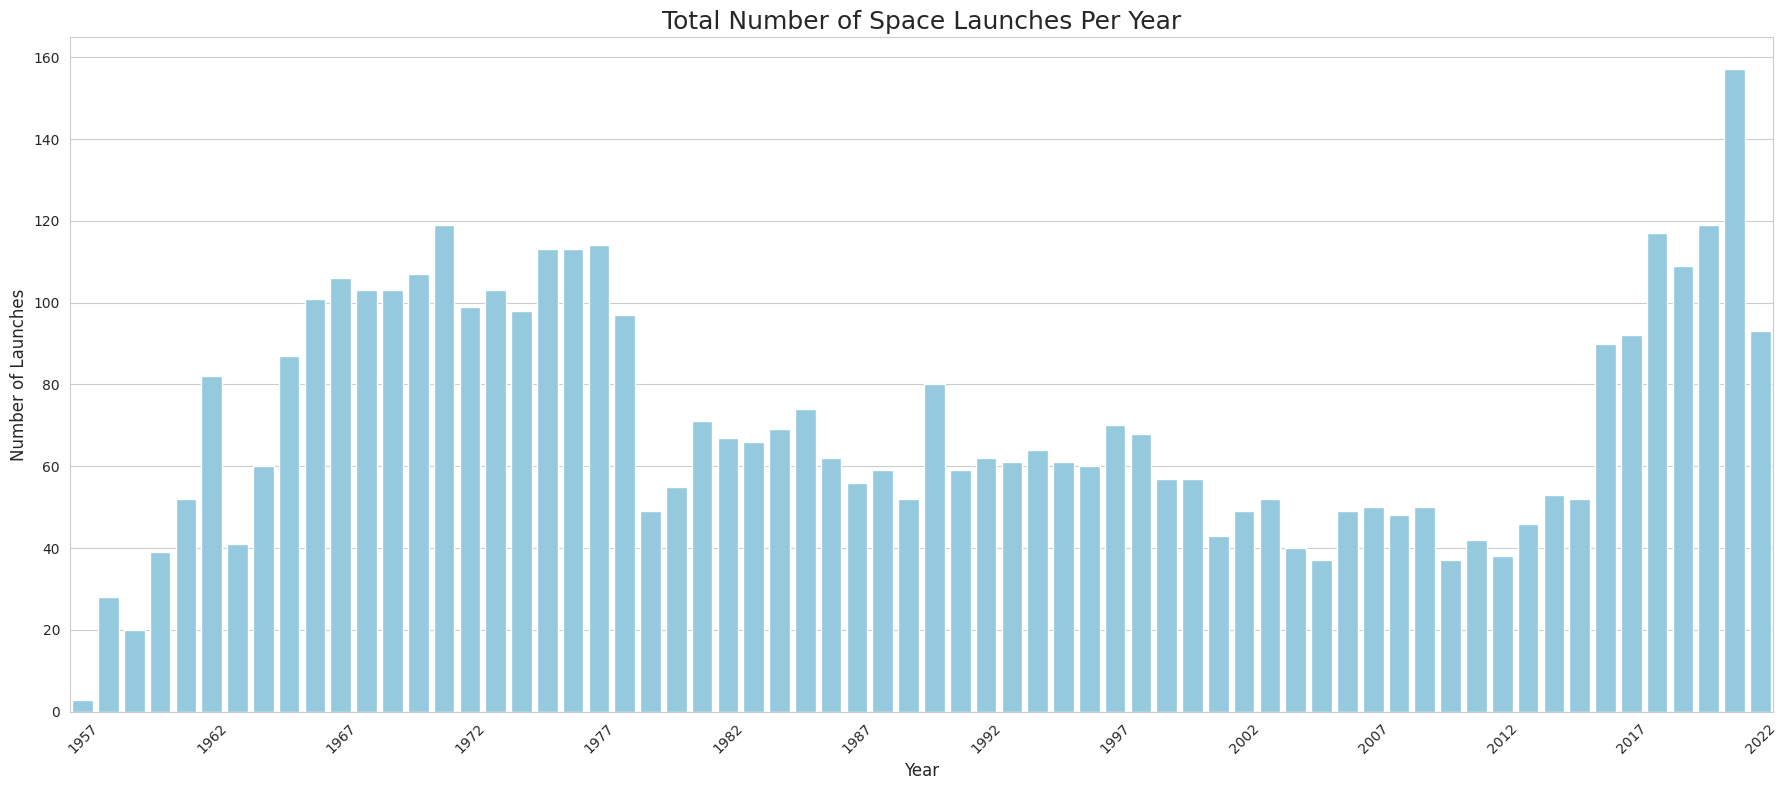

In [16]:
# --- Objective 3, Part 1: Visualize Total Launches Per Year ---

# Set the visual style for the plot
sns.set_style("whitegrid")

# Set the figure size for better readability. (width, height) in inches.
plt.figure(figsize=(18, 8))

# Create the bar plot
# We plot the 'Year' on the x-axis and the 'Total' launches on the y-axis
ax1 = sns.barplot(x=yearly_status_counts.index, y=yearly_status_counts['Total'], color='skyblue')

# Set the title and labels with clear, descriptive text
ax1.set_title('Total Number of Space Launches Per Year', fontsize=18)
ax1.set_ylabel('Number of Launches', fontsize=12)
ax1.set_xlabel('Year', fontsize=12)

# --- Improve the X-axis labels to prevent clutter ---
# Get all the text labels currently on the x-axis
x_labels = ax1.get_xticklabels()

# This loop iterates through the labels and makes only every 5th label visible
for i, label in enumerate(x_labels):
    if i % 5 != 0:  # Check if the index is not a multiple of 5
        label.set_visible(False)

# Rotate the visible labels so they don't overlap
plt.xticks(rotation=45)

# Adjust the plot to ensure everything fits without being cut off
plt.tight_layout()

# Display the final plot
plt.show()

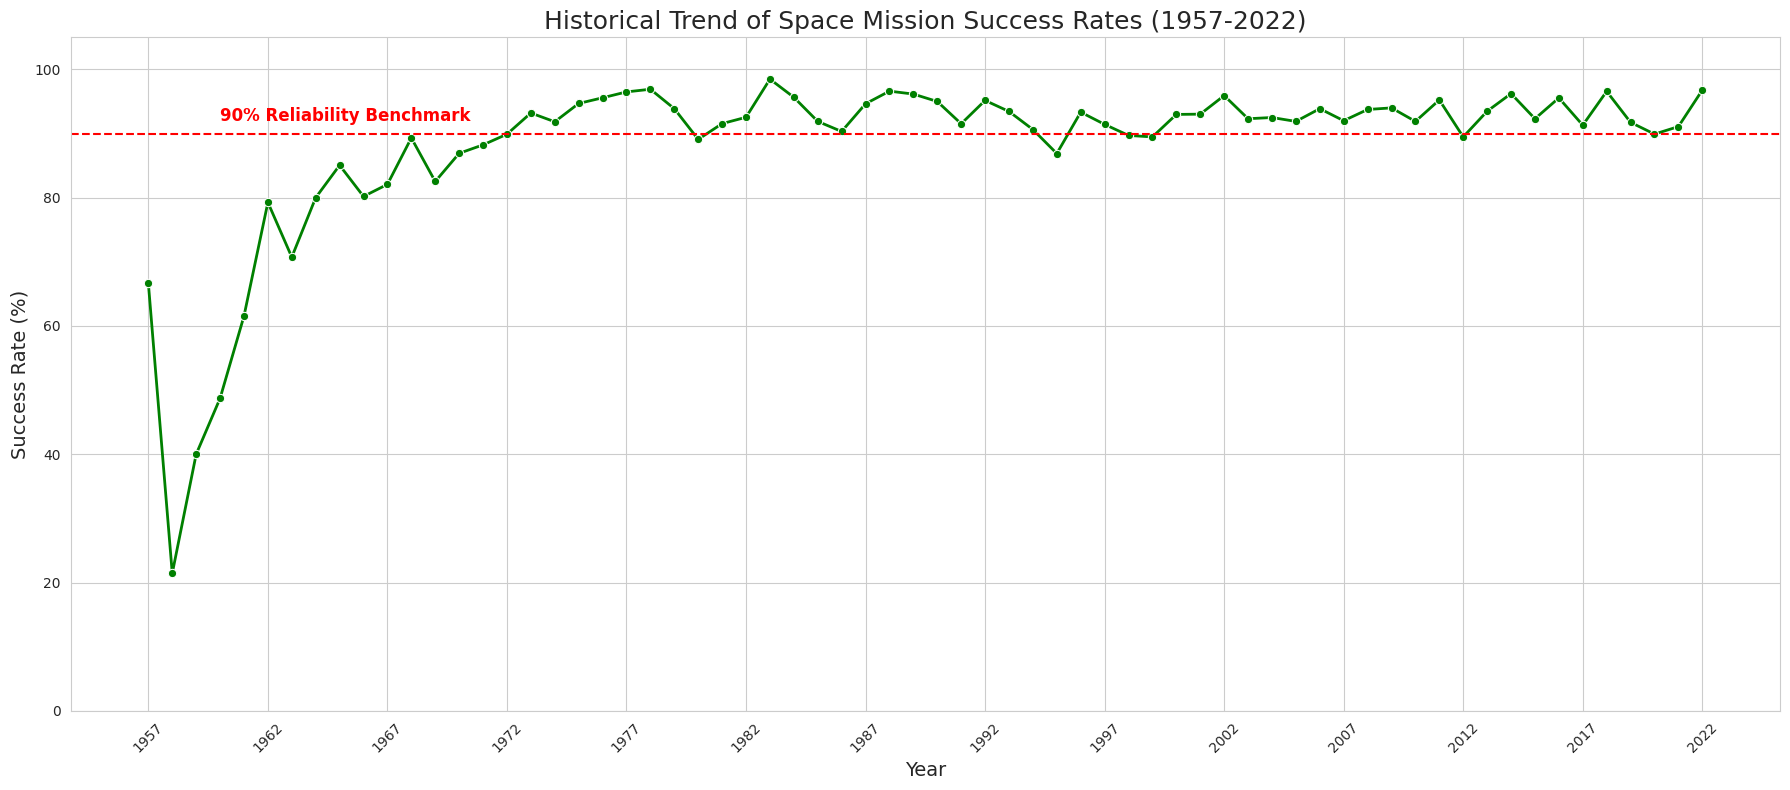

In [18]:
# --- Objective 3, Part 2: Visualize Success Rate Trend ---

# Set the visual style
sns.set_style("whitegrid")

# Set the figure size (width, height)
plt.figure(figsize=(18, 8))

# Create the line plot
# x-axis is the Year (from the index), y-axis is the 'Success_Rate' column
sns.lineplot(
    x=yearly_status_counts.index,
    y=yearly_status_counts['Success_Rate'],
    color='green',  # Use green to represent 'success'
    marker='o',     # Add dots at each data point
    linewidth=2     # Make the line a bit thicker
)

# --- Customizing the Plot for Clarity ---

# Set clear titles and labels
plt.title('Historical Trend of Space Mission Success Rates (1957-2022)', fontsize=18)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Set the Y-axis limit from 0 to 105% to show the full context
plt.ylim(0, 105)

# Add a horizontal red dashed line at 90% as a benchmark
plt.axhline(y=90, color='red', linestyle='--', linewidth=1.5)

# Add text to label the red line
# We place it at the year 1960 and 92% height so it's visible
plt.text(x=1960, y=92, s='90% Reliability Benchmark', color='red', fontsize=12, fontweight='bold')

# --- Clean up the X-axis (Years) ---
# Create a list of years starting from the first year to the last, stepping by 5
years_for_ticks = list(range(yearly_status_counts.index.min(), yearly_status_counts.index.max() + 1, 5))
plt.xticks(years_for_ticks, rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()